# To apply the artificial immune pattern recognition to perform a task of structure damage Classification. 
Your code trains random antibodies to recognize healthy structure data, and then uses them to check if new data is damaged by seeing if it matches or deviates from the healthy pattern.

In [1]:
import numpy as np

In [2]:
def create_antibody(size):
  return np.random.rand(size)

In [3]:
def euclidean_distance(a1, a2):
  return np.linalg.norm(a1 - a2) # Measures distance between antibody and data point 

In [10]:
# This is your healthy structural sensor data
healthy_data = np.array([[1.0, 2.0, 3.0], [1.1, 1.9, 3.2]])
num_antibodies = 10
# These antibodies will evolve over time to "recognize" patterns in the healthy data.
antibody_population = [create_antibody(healthy_data.shape[1]) for i in range(num_antibodies)]
# Simulate sensor data with potential damage (replace with actual data)
damaged_data = np.array([[1.2, 1.7, 2.8], [1.4, 1.5, 3.5]])

In [11]:
# Affinity (closeness)
# High affinity means the antibody matches well with the data point (small distance → high affinity).
# antibodies with high affinity to healthy data are considered good at recognizing normal patterns.
def affinity(antibody, datapoint):
  distance = euclidean_distance(antibody, datapoint)
  return 1 / (1 + distance)

In [12]:
for i in range(2):
  healthy_affinities = [affinity(ab, datapoint) for ab in antibody_population for datapoint in healthy_data]
  # Select top 'n' antibodies based on affinity (healthy data)
  top_antibodies = sorted(zip(antibody_population, healthy_affinities), key=lambda x: x[1], reverse=True)[:5]
  # Clone and introduce random mutations (simplified)
  new_population = []
  for ab, i in top_antibodies:
    new_population.append(ab + np.random.randn(ab.shape[0]) * 0.1)  # Introduce small mutation
    antibody_population = new_population

Affinity check: For each antibody, compute how well it matches the healthy data.

Selection: Pick the top 5 antibodies (with highest affinity).

Clonal selection: Clone(copy) these top antibodies and apply small random mutations (this simulates immune system learning).

Population update: The new antibodies replace the old ones (antibody_population = new_population).

In [7]:
# Update antibody population
antibody_population.extend(new_population)

In [8]:
# Check affinity for damaged data
damaged_affinities = [affinity(ab, damaged_data[0]) for ab in antibody_population]

In [9]:
# Identify potential damage based on high affinity for damaged data
potential_damage_index = damaged_affinities.index(max(damaged_affinities))
print(len(antibody_population))
print("Potential damage detected with antibody:", antibody_population[potential_damage_index])

10
Potential damage detected with antibody: [0.70927443 0.35952125 0.63875188]


In [15]:
best_affinity = max(damaged_affinities)
threshold = 0.5  # simple threshold for classification

if best_affinity > threshold:
    print("⚠️ Potential damage detected!")
else:
    print("✅ Structure is healthy.")

print("Best affinity score:", best_affinity)

✅ Structure is healthy.
Best affinity score: 0.2785427205560833


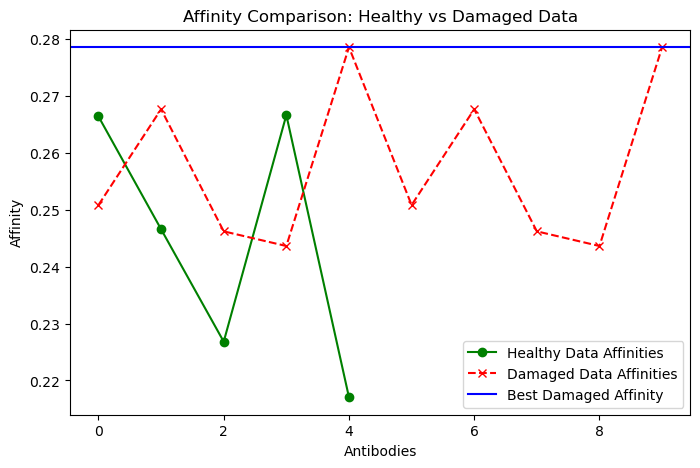

In [16]:
import matplotlib.pyplot as plt
# Step 5: Visualize the results
# Plot the affinities for both healthy and damaged data
healthy_affinities = []
for ab in antibody_population:
    healthy_affinities.append(np.mean([affinity(ab, d) for d in healthy_data]))

# Plotting
plt.figure(figsize=(8, 5))

# Plot healthy and damaged affinities
plt.plot(healthy_affinities, label='Healthy Data Affinities', marker='o', linestyle='-', color='green')
plt.plot(damaged_affinities, label='Damaged Data Affinities', marker='x', linestyle='--', color='red')

# Mark the best affinity
plt.axhline(y=best_affinity, color='blue', linestyle='-', label='Best Damaged Affinity')

# Labels and title
plt.xlabel('Antibodies')
plt.ylabel('Affinity')
plt.title('Affinity Comparison: Healthy vs Damaged Data')
plt.legend()

plt.show()

Q: What is an Artificial Immune System (AIS)?
A: An AIS is a computational system inspired by the natural immune system that is used for pattern recognition, anomaly detection, and classification tasks.

Q: Why did you choose AIS for damage detection?
A: Because AIS is good at distinguishing between normal (healthy) and abnormal (damaged) patterns, which makes it suitable for structural health monitoring.

